In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/kaggle/code/core')
sys.path.append('/kaggle/input/my-flg-library/')
import flg_support as fls
import flg_unet
import flg_numerics
import importlib
import numpy as np
import matplotlib.pyplot as plt
import time
import copy

In [2]:
importlib.reload(flg_unet)
importlib.reload(fls)
train_data = fls.load_all_train_data()

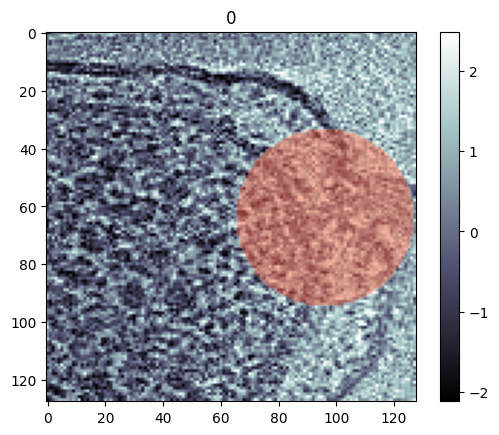

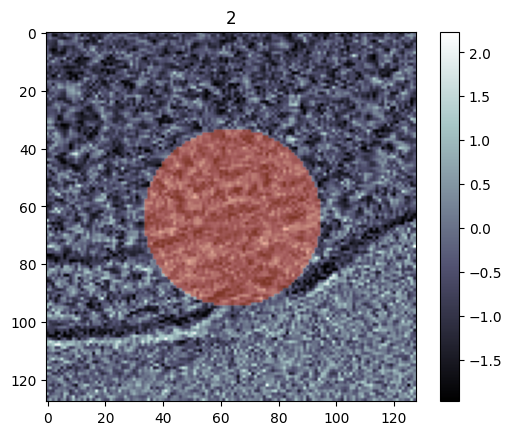

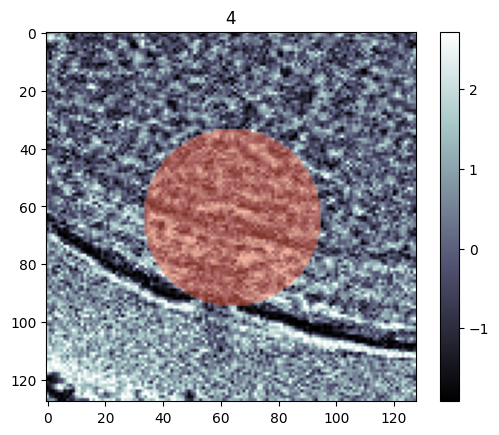

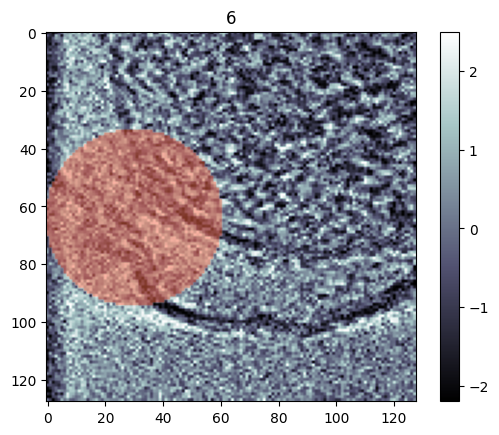

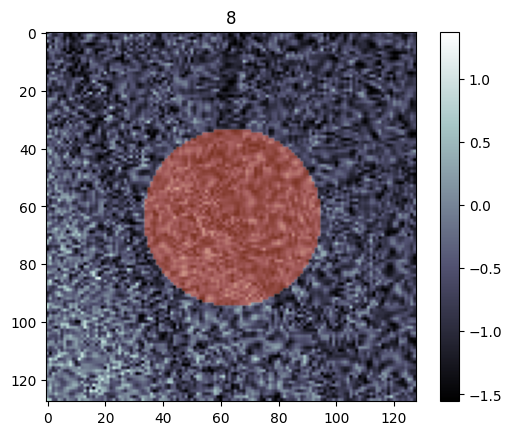

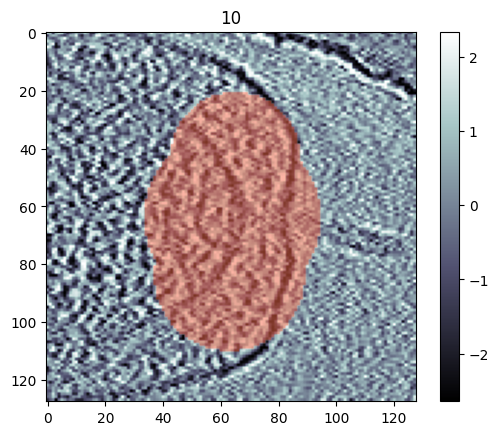

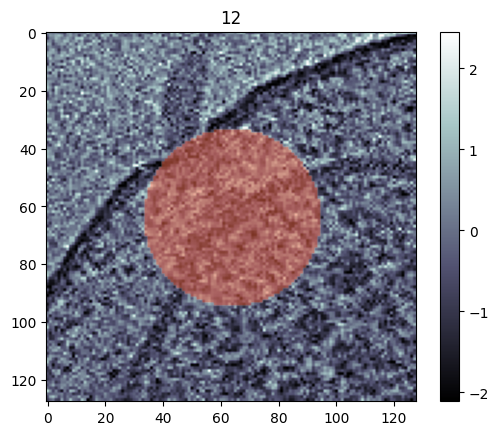

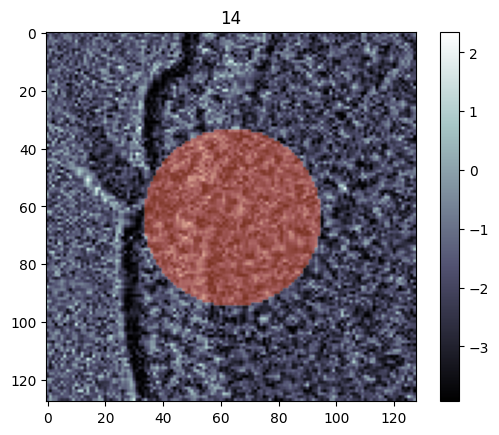

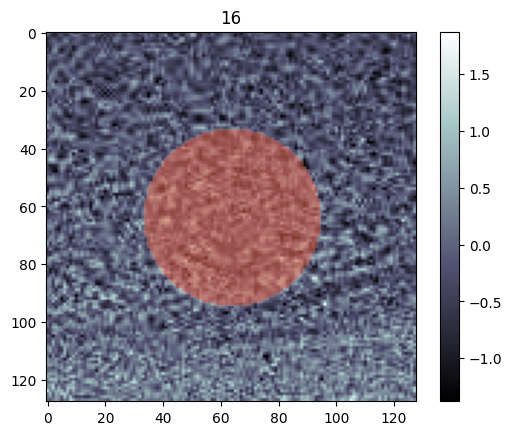

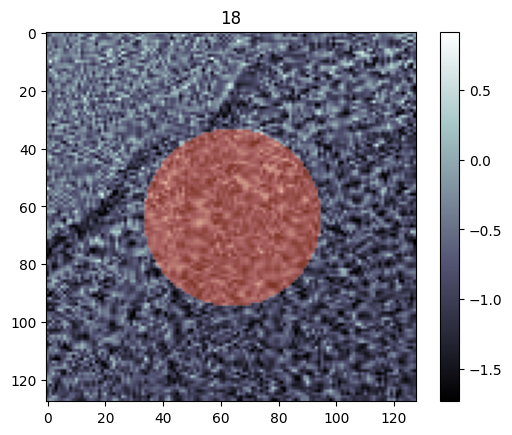

In [5]:
import time
importlib.reload(flg_unet)
importlib.reload(flg_numerics)
for j in range(1):
    dataset = flg_unet.DatasetTrain()
    dataset.data_list = copy.deepcopy(train_data)
    dataset.size =(128,128,128)
    dataset.normalize=True
    #dataset.n_positive = 0
    train_loader = torch.utils.data.DataLoader(
        dataset,
        batch_size=1,
        num_workers=0,
        pin_memory=True,
        persistent_workers=False
    )
    train_loader_iter = iter(train_loader)  
    for i in range(20):
        image,target = next(train_loader_iter)
        #image = xx[0]
        #target = xx[1]
        #time.sleep(0.2)
        if np.sum(target.numpy()[0,64,:,:])>0:
            plt.figure()
            plt.imshow(image.numpy()[0,64,:,:], cmap='bone')
            plt.colorbar()
    
            # Get the "Reds" colormap.
            cmap = plt.get_cmap('Reds')
            
            # Map B_norm through the colormap to get an RGBA image.
            B = target.numpy()[0,64,:,:]/2
            rgba_B = cmap(B)
            
            # Replace the alpha channel with B_norm values.
            rgba_B[..., -1] = B  # This sets opacity proportional to the value in B.
            
            # Overlay the RGBA image on top of matrix A.
            plt.imshow(rgba_B)            
            plt.title(str(i))
    #print(time.time()-t)
        